<a href="https://colab.research.google.com/github/sumankanukollu/EVA_4_Assignments/blob/S_10_LRFinder_Misclassified_Cifar10/EVA_4_S10_Suman_Kanukollu_LRFinder_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Steps Summary

In [0]:
# 1. Mount google drive
# 2. Import all modules and libraries
# 3. Set the directory path of google drive
# 4. Set Device
# 5. Import all the functions
# 6. Load transformations
# 7. Load dataset
# 8. Load Classes
# 9. Just get some random images from Train dataset and plot those
# 10.Load Resnet18 model on to respective device (GPU or CPU) and print summary
# 11.Define loss function and optimizer
  # 11.1.1 LR Finder Installation
  # 11.1.2. Find Learning Rate and plot graph (loss Vs LR)
# 12. Run Train and Test with ReduceLROnPlateau
  # 12.1. Plot Metrics - Accuracy and Loss
# 13. Plot misclassified images
# 14. Save misclassified images in drive
# 15. Apply Gradcam
# 16. Plot misclassified images after applying gradcam
# 17. Grad-CAM Test: Load images from drive and apply Gradcam on that



**1. Mount google drive**




In [79]:
from google.colab import drive
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
drive.mount('/content/drive')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [80]:
# 2. Auto load the modified content
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload




**2.   Import all required modules**




In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
from torchvision import datasets,transforms

from torchsummary import summary

from tqdm import tqdm

import  matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.debugger import set_trace

import numpy as np
!pip install albumentations
!pip install -U git+https://github.com/albu/albumentations --no-cache-dir

  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-05k6fabt
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-05k6fabt
  Created wheel for albumentations: filename=albumentations-0.4.5-cp36-none-any.whl size=65100 sha256=d850ca520319930f45d5b14d0b621ced36132e21afb26eae5ee69cd46c9c3185
  Stored in directory: /tmp/pip-ephem-wheel-cache-ai7svq49/wheels/45/8b/e4/2837bbcf517d00732b8e394f8646f22b8723ac00993230188b
Successfully built albumentations
  Found existing installation: albumentations 0.4.5
    Uninstalling albumentations-0.4.5:
      Successfully uninstalled albumentations-0.4.5


**3. Set the modules homepath and library path**

In [5]:
import os,sys
os.chdir('/content/drive/My Drive/pytorch_Framework_suman')
homepath = os.getcwd()
print('\n### Home Path is : {}'.format(homepath))
!ls
sys.path.append(os.path.join(homepath,'lib'))
print(sys.path)


### Home Path is : /content/drive/My Drive/pytorch_Framework_suman
25_misclassifiedGradCamImages.jpg		   misclassified.png
data						   models
EVA-4-S10-Suman-Kanukollu-LRFinder_CIFAR_10.ipynb  outputs
EVA-4-S9-Suman-Kanukollu-Main.ipynb		   resnet18_cifar10_main.ipynb
lib						   sampleImages
metrics.png					   utils
['', '/env/python', '/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '/usr/local/lib/python3.6/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.6/dist-packages/IPython/extensions', '/root/.ipython', '/content/drive/My Drive/pytorch_Framework_suman/lib']


**4. Set Device**

In [6]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
print(torch.cuda.is_available())

cuda
True


**5. Import All reusable modules**

In [0]:
from models import resnet
from lib.loadDataSet import dataSetFunctions
from utils.showimgs import utils_showimgs

**6. Load transformations**

In [0]:
dsObj = dataSetFunctions()
#set_trace()
transform_train, transform_test = dsObj.albumentationTransformations()

In [9]:
import albumentations as A
dir(A.Rotate)
#A.RGBShift

['__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_get_target_function',
 '_to_dict',
 'add_targets',
 'apply',
 'apply_to_bbox',
 'apply_to_bboxes',
 'apply_to_keypoint',
 'apply_to_keypoints',
 'apply_to_mask',
 'apply_to_masks',
 'apply_with_params',
 'call_backup',
 'get_base_init_args',
 'get_class_fullname',
 'get_dict_with_id',
 'get_params',
 'get_params_dependent_on_targets',
 'get_transform_init_args',
 'get_transform_init_args_names',
 'set_deterministic',
 'target_dependence',
 'targets',
 'targets_as_params',
 'update_params']

**7. Load dataset**

In [10]:
(trainset,testset)          = dsObj.dataSet(transform=(transform_train, transform_test),name='cifar10')
(train_loader,test_loader)  = dsObj.dataLoader(trainDataset=trainset,testDataset=testset)


### Preparing dataset for the name : cifar10
Files already downloaded and verified
Files already downloaded and verified

### Loading data from dataset


**8. Load classes**

In [11]:
dsObj.dataSetClasses(trainset)

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

**9. Just get some random images from Train dataset and plot those**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


128
{'airplane': 0, 'automobile': 1, 'bird': 2, 'cat': 3, 'deer': 4, 'dog': 5, 'frog': 6, 'horse': 7, 'ship': 8, 'truck': 9}
tensor([2, 7, 1, 6, 1, 0, 8, 1, 8, 7, 5, 5, 3, 9, 3, 0, 2, 7, 0, 9, 9, 2, 5, 0,
        1, 4, 8, 7, 5, 3, 9, 7, 7, 4, 5, 8, 3, 0, 2, 9, 7, 7, 0, 3, 9, 3, 3, 1,
        1, 9, 5, 2, 4, 2, 1, 7, 1, 3, 1, 5, 2, 7, 2, 8, 4, 7, 8, 6, 7, 8, 6, 8,
        7, 0, 5, 7, 0, 7, 5, 0, 1, 5, 4, 0, 7, 0, 9, 2, 0, 2, 2, 8, 0, 1, 5, 9,
        7, 6, 7, 3, 6, 3, 9, 4, 1, 4, 3, 9, 6, 4, 2, 0, 8, 3, 2, 1, 7, 7, 2, 9,
        3, 0, 9, 4, 7, 0, 2, 6])
      bird      horse automobile       frog


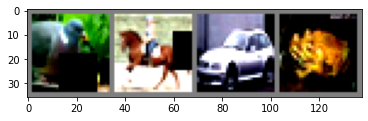

In [12]:
#from utils.showimgs import utils_showimgs
utObj = utils_showimgs()

utObj.getRandomTrainImgs(trainset,train_loader)

**10. Load Resnet18 model on to respective device (GPU or CPU) and print summary**

In [13]:
from models import resnet
print('Model is going to run on device : {}'.format(device))
model = resnet.ResNet18().to(device)
summary(model,(3,32,32))

Model is going to run on device : cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728


**11. Define loss function and optimizer**

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

#net = model
#criterion = nn.CrossEntropyLoss()
#criterion = nn.NLLLoss()
#optimizer = optim.Adam(model.parameters(), lr = 0.01)
#optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)'''

**11.1. LR Finder Installation**

In [15]:
!pip install torch-lr-finder -v --global-option="amp"

/usr/local/lib/python3.6/dist-packages/pip/_internal/commands/install.py:283: UserWarning: Disabling all use of wheels due to the use of --build-options / --global-options / --install-options.
  cmdoptions.check_install_build_global(options)
Created temporary directory: /tmp/pip-ephem-wheel-cache-7jvj1w49
Created temporary directory: /tmp/pip-req-tracker-mhixq1ct
Created requirements tracker '/tmp/pip-req-tracker-mhixq1ct'
Created temporary directory: /tmp/pip-install-8tjwbfo8
Cleaning up...
Removed build tracker '/tmp/pip-req-tracker-mhixq1ct'


**11.1.2. Find Learning Rate and plot graph (loss Vs LR)**


  pip install torch-lr-finder -v --global-option="amp"


Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()


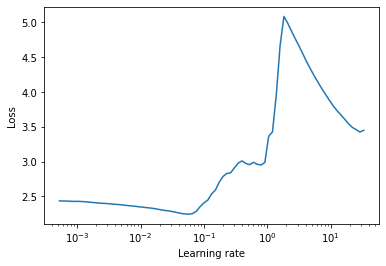

Min loss value is : 2.244990271388565 
Min LR value is   : 0.0001318257
Min loss observed at index : 44
so corresponding LR value at that index is : 0.05754399373371571
Best LR Value for the given model is : 0.05754399373371571


In [16]:
from lib.lrFinder import LRFinderClass

model = model
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.0001,momentum=0.2)

lrfObj = LRFinderClass(model, optimizer, criterion, device)
(min_loss,bestLr) = lrfObj.getBestLr_where_lowLoss(train_loader=train_loader,end_lr=100, num_iter=100, step_mode="exp")
print('Best LR Value for the given model is : {}'.format(bestLr))

**12. Run Train and Test with ReduceLROnPlateau**

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=bestLr,momentum=0.9)
from torch.optim.lr_scheduler import ReduceLROnPlateau
scheduler = ReduceLROnPlateau(optimizer, mode='min')

In [18]:
trainaccuracies = []
trainlosses = []
vallosses = []
valaccuracies = []
misclassifieditems = []

from lib import trainTestMethods
for epoch in range(1,20):
    #trainTestMethods.train(model, train_loader, device, optimizer, criterion, epoch)
    #trainTestMethods.test(model, test_loader, device, criterion, epoch)
    trainTestMethods.trainWithAccPlt(network=model, trainloader=train_loader, device='cuda', optimizer=optimizer, criterion=criterion, trainaccuracies=trainaccuracies, trainlosses=trainlosses, epoch=epoch)
    testloss = trainTestMethods.testWithAccPlt(network=model, testloader=test_loader, device='cuda', criterion=criterion, valaccuracies=valaccuracies, vallosses=vallosses, epoch=epoch)
    scheduler.step(testloss)


Epoch: 1
 [================================================================>]  Step: 103ms | Tot: 1m4s | Train >> Loss: 1.713 | Acc: 37.426% (18713/50000) 391/391 
 [================================================================>]  Step: 14ms | Tot: 2s971ms | Test >> Loss: 1.324 | Acc: 51.170% (5117/10000) 79/79 
0.010457555067539216

Epoch: 2
 [================================================================>]  Step: 106ms | Tot: 1m3s | Train >> Loss: 1.327 | Acc: 52.088% (26044/50000) 391/391 
 [================================================================>]  Step: 13ms | Tot: 2s867ms | Test >> Loss: 1.239 | Acc: 56.930% (5693/10000) 79/79 
0.009785164427757263

Epoch: 3
 [================================================================>]  Step: 106ms | Tot: 1m3s | Train >> Loss: 1.123 | Acc: 59.972% (29986/50000) 391/391 
 [================================================================>]  Step: 11ms | Tot: 2s899ms | Test >> Loss: 0.906 | Acc: 68.350% (6835/10000) 79/79 
0.00

In [19]:
for epoch in range(20,31):
    #trainTestMethods.train(model, train_loader, device, optimizer, criterion, epoch)
    #trainTestMethods.test(model, test_loader, device, criterion, epoch)
    trainTestMethods.trainWithAccPlt(network=model, trainloader=train_loader, device='cuda', optimizer=optimizer, criterion=criterion, trainaccuracies=trainaccuracies, trainlosses=trainlosses, epoch=epoch)
    testloss = trainTestMethods.testWithAccPlt(network=model, testloader=test_loader, device='cuda', criterion=criterion, valaccuracies=valaccuracies, vallosses=vallosses, epoch=epoch)
    scheduler.step(testloss)


Epoch: 20
 [================================================================>]  Step: 105ms | Tot: 1m4s | Train >> Loss: 0.337 | Acc: 88.314% (44157/50000) 391/391 
 [================================================================>]  Step: 10ms | Tot: 2s943ms | Test >> Loss: 0.388 | Acc: 87.480% (8748/10000) 79/79 
0.003063062772154808

Epoch: 21
 [================================================================>]  Step: 106ms | Tot: 1m4s | Train >> Loss: 0.320 | Acc: 88.834% (44417/50000) 391/391 
 [================================================================>]  Step: 14ms | Tot: 2s954ms | Test >> Loss: 0.445 | Acc: 86.660% (8666/10000) 79/79 
0.0035162948668003083

Epoch: 22
 [================================================================>]  Step: 105ms | Tot: 1m4s | Train >> Loss: 0.303 | Acc: 89.606% (44803/50000) 391/391 
 [================================================================>]  Step: 14ms | Tot: 2s844ms | Test >> Loss: 0.403 | Acc: 87.780% (8778/10000) 79/79 


In [20]:
for epoch in range(31,41):
    #trainTestMethods.train(model, train_loader, device, optimizer, criterion, epoch)
    #trainTestMethods.test(model, test_loader, device, criterion, epoch)
    trainTestMethods.trainWithAccPlt(network=model, trainloader=train_loader, device='cuda', optimizer=optimizer, criterion=criterion, trainaccuracies=trainaccuracies, trainlosses=trainlosses, epoch=epoch)
    testloss = trainTestMethods.testWithAccPlt(network=model, testloader=test_loader, device='cuda', criterion=criterion, valaccuracies=valaccuracies, vallosses=vallosses, epoch=epoch)
    scheduler.step(testloss)


Epoch: 31
 [================================================================>]  Step: 106ms | Tot: 1m4s | Train >> Loss: 0.234 | Acc: 91.854% (45927/50000) 391/391 
 [================================================================>]  Step: 14ms | Tot: 2s985ms | Test >> Loss: 0.367 | Acc: 89.260% (8926/10000) 79/79 
0.0028969051256775855

Epoch: 32
 [================================================================>]  Step: 106ms | Tot: 1m4s | Train >> Loss: 0.227 | Acc: 92.104% (46052/50000) 391/391 
 [================================================================>]  Step: 12ms | Tot: 2s918ms | Test >> Loss: 0.411 | Acc: 88.330% (8833/10000) 79/79 
0.003248470467329025

Epoch: 33
 [================================================================>]  Step: 102ms | Tot: 1m4s | Train >> Loss: 0.221 | Acc: 92.408% (46204/50000) 391/391 
 [================================================================>]  Step: 14ms | Tot: 2s919ms | Test >> Loss: 0.368 | Acc: 89.020% (8902/10000) 79/79 


In [21]:
for epoch in range(41,51):
    #trainTestMethods.train(model, train_loader, device, optimizer, criterion, epoch)
    #trainTestMethods.test(model, test_loader, device, criterion, epoch)
    trainTestMethods.trainWithAccPlt(network=model, trainloader=train_loader, device='cuda', optimizer=optimizer, criterion=criterion, trainaccuracies=trainaccuracies, trainlosses=trainlosses, epoch=epoch)
    testloss = trainTestMethods.testWithAccPlt(network=model, testloader=test_loader, device='cuda', criterion=criterion, valaccuracies=valaccuracies, vallosses=vallosses, epoch=epoch)
    scheduler.step(testloss)


Epoch: 41
 [================================================================>]  Step: 108ms | Tot: 1m4s | Train >> Loss: 0.186 | Acc: 93.608% (46804/50000) 391/391 
 [================================================================>]  Step: 15ms | Tot: 3s38ms | Test >> Loss: 0.371 | Acc: 90.230% (9023/10000) 79/79 
0.002931694282591343

Epoch: 42
 [================================================================>]  Step: 109ms | Tot: 1m3s | Train >> Loss: 0.178 | Acc: 93.876% (46938/50000) 391/391 
 [================================================================>]  Step: 12ms | Tot: 2s939ms | Test >> Loss: 0.387 | Acc: 89.990% (8999/10000) 79/79 
0.003053364013135433

Epoch: 43
 [================================================================>]  Step: 106ms | Tot: 1m4s | Train >> Loss: 0.171 | Acc: 93.982% (46991/50000) 391/391 
 [================================================================>]  Step: 14ms | Tot: 2s873ms | Test >> Loss: 0.343 | Acc: 90.250% (9025/10000) 79/79 
0.

**12.1. Plot Metrics - Accuracy and Loss**

Target achieved at 19th epoach,Train accuracy is : 88.018


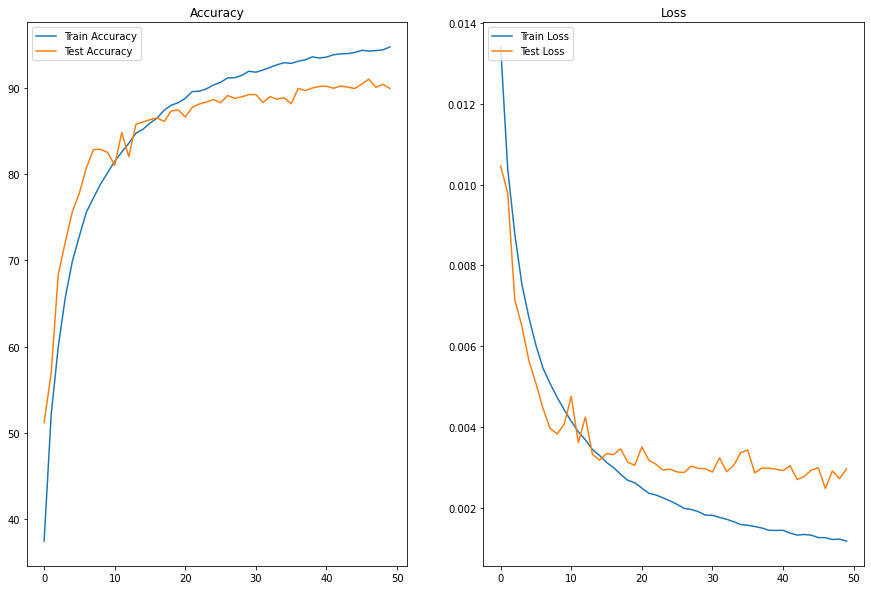

Max. Train Accuracy outoff 50-epochs is : 94.79 at 50-Epoach
Max. Test Accuracy  outoff 50-epochs is : 91.05 at 47-Epoach


Min. Train Loss outoff 50-epochs is : 0.001190 at 50-Epoach
Min. Test Loss  outoff 50-epochs is : 0.002489 at 47-Epoach
Target-88.0% achieved at 19th epoach,Train accuracy is : 88.018
Target-88.0% achieved at 23th epoach,Test accuracy is : 88.17


In [81]:
from lib import trainTestMethods
trainTestMethods.plotmetrics(88,trainaccuracies, valaccuracies, trainlosses, vallosses, savefilename="metrics")

**13. Plot misclassified images**

In [23]:
tuple(trainset.class_to_idx.keys())

('airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck')

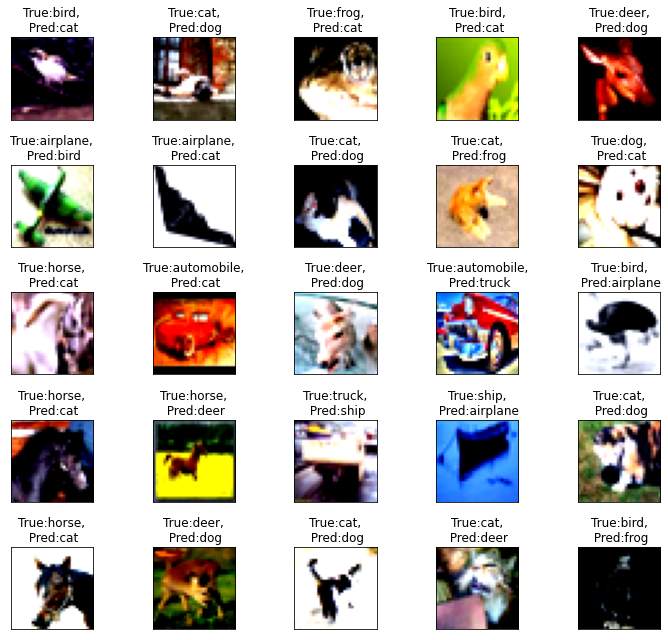

In [24]:
utObj.plotmisclassifiedimages(model=model, device='cuda', classes=tuple(trainset.class_to_idx.keys()), testloader=test_loader, numofimages = 25, savefilename="misclassified")

**14. Save misclassified images in drive**

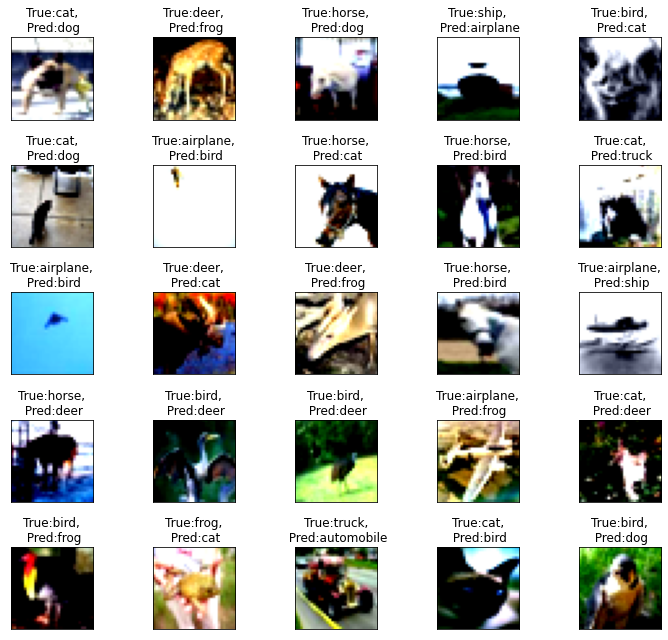

In [25]:
(misclassifiedimagenames, misclassifiedtitles) = utObj.savemisclassifiedimages(model=model, device='cuda', classes=tuple(trainset.class_to_idx.keys()), testloader=test_loader, outputdirectory=os.path.join(homepath,'outputs'), numofimages = 25)

**15. Apply Gradcam**

In [26]:
import os
from lib.gradCam.gradcam import GradCAM, GradCAMpp
from lib.gradCam.gradcam_utils import Normalize, visualize_cam
from torchvision.utils import make_grid
tmp=[]
sys.path.append(os.path.join(homepath,'outputs'))
for img in misclassifiedimagenames:
    imagename = img    
    pil_img = utObj.loadImage(os.path.join(homepath,'outputs'), imagename)
    pil_img.resize(size=(200,200))
    normalizer = Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    torch_img = torch.from_numpy(np.asarray(pil_img)).permute(2, 0, 1).unsqueeze(0).float().div(255).cuda()
    torch_img = F.upsample(torch_img, size=(32, 32), mode='bilinear', align_corners=False)
    normed_torch_img = normalizer(torch_img)
    resnet = model
    resnet.eval(), resnet.cuda();
    model_dict = dict(type='resnet', arch=resnet, layer_name='layer4', input_size=(32, 32))
    gradcam = GradCAM(model_dict, True)
    gradcampp = GradCAMpp(model_dict)
    mask, _ = gradcam(normed_torch_img)
    heatmap, result = visualize_cam(mask.cpu(), torch_img.cpu())

    mask_pp, _ = gradcampp(normed_torch_img)
    heatmap_pp, result_pp = visualize_cam(mask_pp.cpu(), torch_img.squeeze().cpu())
    
    imgs = []
    #set_trace()
    imgs.append(torch.stack([torch_img.squeeze().cpu(), heatmap, heatmap_pp, result, result_pp], 0))
    imgs = make_grid(torch.cat(imgs, 0), nrow=5)
    tmp.append(imgs)
    
    #to_pil = torchvision.transforms.ToPILImage()
    #img = to_pil(imgs)
    #plt.imshow(img)
    #plt.imshow(img)
    #set_trace()
    #pilimg = utObj.saveimage(images = imgs, outputdirectory=os.path.join(homepath,'outputs'), imagename=imagename.split('.')[0]+'_gradCam.jpg')
    #pilimg = utObj.saveimage(images = imgs, outputdirectory=os.path.join(homepath,'outputs'), imagename=imagename.split('.')[0]+'_gradCam.jpg')
    #pilimg.resize((700,200))



/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])


**16. Plot misclassified images after applying gradcam**

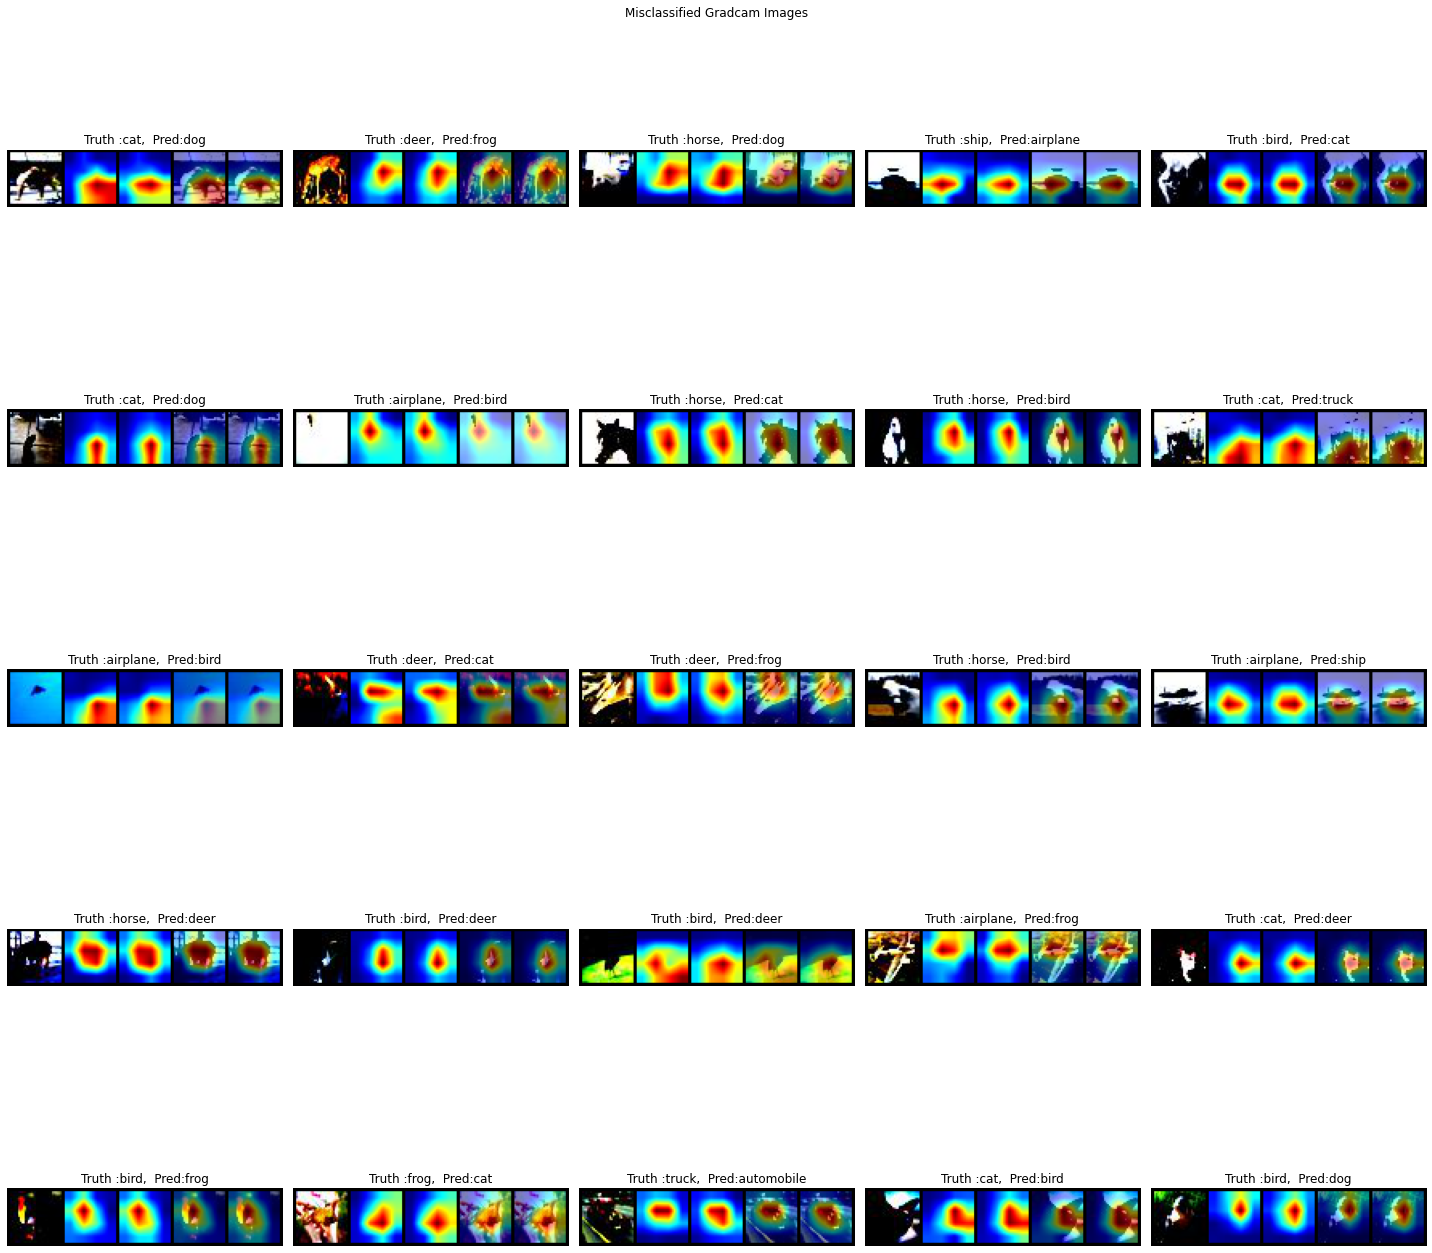

In [27]:
import numpy as np
from torch.autograd import Variable
def predict_image(imageNo):
    return tuple(misclassifiedtitles[imageNo].splitlines())

def row(r):
	for i in range(0,r):
		yield i
		
def col(c):
	for i in range(c):
		yield i
		
def plotImage(image):
	to_pil = transforms.ToPILImage()
	

to_pil = transforms.ToPILImage()

fig,ax = plt.subplots(5,5,figsize=(20,20))
fig.suptitle('Misclassified Gradcam Images')
imageNo = 0
for i in row(5):
  for j in col(5):
    image = to_pil(tmp[imageNo])
    (truth,pred) = predict_image(imageNo)
    ax[i][j].imshow(image)
    ax[i][j].axis('off')
    ax[i][j].set_title('Truth :{}  Pred:{}'.format(str(truth.strip().split(':')[-1]),str(pred.strip().split(':')[-1])))
    imageNo = imageNo+1
fig.tight_layout()
fig.savefig("25_misclassifiedGradCamImages.jpg")

**17. Grad-CAM Test: Load images from drive and apply Gradcam on that**

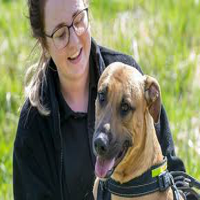

In [28]:
import os
sys.path.append(os.path.join(homepath,'sampleImages'))
imagename = 'dog7.jpg'
pil_img = utObj.loadImage(os.path.join(homepath,'sampleImages'), imagename)
pil_img.resize(size=(200,200))

In [0]:
from lib.gradCam.gradcam import GradCAM, GradCAMpp
from lib.gradCam.gradcam_utils import Normalize, visualize_cam

In [30]:
normalizer = Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
torch_img = torch.from_numpy(np.asarray(pil_img)).permute(2, 0, 1).unsqueeze(0).float().div(255).cuda()
torch_img = F.upsample(torch_img, size=(32, 32), mode='bilinear', align_corners=False)
normed_torch_img = normalizer(torch_img)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


In [31]:
resnet = model
resnet.eval(), resnet.cuda();
model_dict = dict(type='resnet', arch=resnet, layer_name='layer4', input_size=(32, 32))
gradcam = GradCAM(model_dict, True)
gradcampp = GradCAMpp(model_dict)

saliency_map size : torch.Size([4, 4])


In [32]:
mask, _ = gradcam(normed_torch_img)
heatmap, result = visualize_cam(mask.cpu(), torch_img.cpu())

mask_pp, _ = gradcampp(normed_torch_img)
heatmap_pp, result_pp = visualize_cam(mask_pp.cpu(), torch_img.squeeze().cpu())

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


In [0]:
from torchvision.utils import make_grid
imgs = []
imgs.append(torch.stack([torch_img.squeeze().cpu(), heatmap, heatmap_pp, result, result_pp], 0))
imgs = make_grid(torch.cat(imgs, 0), nrow=5)

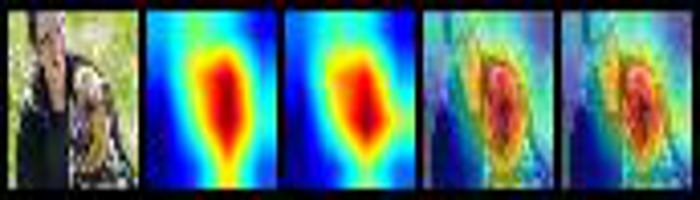

In [34]:
pilimg = utObj.saveimage(images = imgs, outputdirectory=os.path.join(homepath,'outputs'), imagename=imagename.split('.')[0]+'_gradCam.jpg')

pilimg.resize((700,200))